In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
alpha = 1
beta = 0

# initial step size
eta0 = 1
# initial probability for beta > 0
prob0 = 0.5
# initial probability for beta = 0
prob00 = 0.1


d1 = 5
d2 = 2
mu = 1
var = 1

In [3]:
prob_seed = 1
np.random.seed(prob_seed)
mat_S = np.random.randn(d1, d1) / np.sqrt(d1)
mat_S = mat_S @ mat_S.T
mat_S = mat_S + mu * np.identity(d1)
vec_b = np.random.randn(d1)

mat_A = np.random.randn(d1, d1 - d2)
proj_A = mat_A @ np.linalg.inv(mat_A.T @ mat_A) @ mat_A.T
proj_A_bot = np.identity(d1) - proj_A
print(proj_A_bot @ proj_A_bot - proj_A_bot)

[[-2.77555756e-16 -1.11022302e-16  5.55111512e-17  1.04083409e-17
  -2.35922393e-16]
 [-1.11022302e-16 -1.11022302e-16  5.55111512e-17 -1.38777878e-17
  -1.66533454e-16]
 [ 8.32667268e-17  8.32667268e-17  0.00000000e+00  0.00000000e+00
   6.07153217e-17]
 [-2.08166817e-17 -2.77555756e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.94289029e-16 -1.38777878e-16  1.02348685e-16 -2.77555756e-17
  -8.32667268e-17]]


In [4]:
np.linalg.eig(mat_S)

(array([5.31876691, 1.00075967, 1.27949346, 1.70364906, 1.48649616]),
 array([[-0.42501696,  0.10337701, -0.8551932 , -0.27320454,  0.05174593],
        [ 0.61604378, -0.56299286, -0.24590141, -0.44274302, -0.21688757],
        [-0.56593484, -0.54099787,  0.36882926, -0.43017644,  0.25681173],
        [ 0.12772785,  0.61590032,  0.24596981, -0.73740115, -0.00952864],
        [ 0.3213316 ,  0.01844844, -0.10789303,  0.02292756,  0.94033988]]))

In [5]:
proj_A_bot = np.identity(d1) - proj_A
[eig_D, eig_U] = np.linalg.eigh(proj_A_bot)
# print((eig_U * eig_D) @ eig_U.T - proj_A_bot)
# print(proj_A_bot @ eig_U @ eig_U.T - eig_U * eig_D @ eig_U.T)
# print(proj_A_bot @ eig_U - eig_U * eig_D)
# proj_A_bot @ eig_U @ eig_U.T - proj_A_bot
# # eig: if the eigenvalues are not all different, the eigenvector matrix is not necessarily an orthogonal matrix.
# print(eig_U @ (eig_U.T))
# print(eig_U.T @ eig_U)

U1 = eig_U[:,eig_D < 1e-8]
U2 = eig_U[:,eig_D > 1e-8]
sol = U2 @ np.linalg.inv(U2.T @ mat_S @ U2) @ U2.T @ vec_b
sol_uncons = np.linalg.inv(mat_S) @ vec_b
loss_min = np.dot(mat_S @ sol, sol) / 2 - np.dot(sol, vec_b)
print(loss_min, -np.dot(sol_uncons, vec_b)/2 )
print(sol, sol_uncons)
# print(sol, proj_A @ sol, proj_A_bot @ sol)
# print(np.linalg.inv(mat_S), mat_S, mat_S @ np.linalg.inv(mat_S))

-0.1627342673614958 -0.3775333808856885
[-0.07760314  0.0538097  -0.20719787 -0.32844305 -0.00538058] [-0.26039182 -0.38142462 -0.4123078  -0.10655251  0.21831976]


In [118]:
print(eig_U, eig_D, eig_U * eig_D)

[[ 1.64227223e-01  4.88121785e-01  3.21701066e-03 -1.08806611e-17
   8.57179207e-01]
 [-5.44539635e-01 -8.11871969e-02  4.67337082e-01 -6.75527816e-01
   1.48806740e-01]
 [ 2.40536930e-01  3.41081894e-01 -5.60067176e-01 -6.74822105e-01
  -2.38212116e-01]
 [ 3.67184253e-01  5.45116121e-01  6.48977119e-01  3.05725201e-03
  -3.83201632e-01]
 [-6.95574378e-01  5.84514600e-01 -2.16192414e-01  2.97099224e-01
  -1.98775900e-01]] [-3.61375015e-16 -3.24188690e-16  6.64660069e-17  1.00000000e+00
  1.00000000e+00] [[-5.93476152e-17 -1.58243562e-16  2.13821853e-19 -1.08806611e-17
   8.57179207e-01]
 [ 1.96783019e-16  2.63199710e-17  3.10620298e-17 -6.75527816e-01
   1.48806740e-01]
 [-8.69240365e-17 -1.10574892e-16 -3.72254288e-17 -6.74822105e-01
  -2.38212116e-01]
 [-1.32691215e-16 -1.76720481e-16  4.31349177e-17  3.05725201e-03
  -3.83201632e-01]
 [ 2.51363201e-16 -1.89493023e-16 -1.43694465e-17  2.97099224e-01
  -1.98775900e-01]]


In [318]:
# this is the old version
np.random.seed(0)

alpha = 1
beta = 0
alpha_list = [1.0, 0.8, 0.6]
# alpha_list = [1.0]
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]

# about eta0: 2 ~ 1 or 2e-6; 1 ~ 2e-6; 0.5 ~  1e-5
eta0 = 1
eta00 = 0.2
var = 1

n_ite = 10000
prob00 = 0.1
n_rep = 10

u_rep_list = []
v_rep_list = []
mse_rep_list = []
loss_rep_list = []
x0 = np.random.randn(d1)
# x = [-0.2137868,  -0.25430353,  0.06504259,  0.13629248, -0.16155468]
# x = [-2.59083535, -3.08184877,  0.78823692,  1.65169866, -1.9578458 ]
# u = proj_A_bot @ x
# v = x - u
# u_list.append(u)
# v_list.append(v)
# mse = np.linalg.norm(u - sol) ** 2
# loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
# mse_list.append(mse)
# loss_list.append(loss - loss_min)

store_path = '../workspace/LPSA/mse_tmp/'

for alpha in alpha_list:
    for beta in beta_list:
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = store_path + para + '/'
        if not os.path.exists(path):
            os.makedirs(path)
            
        if alpha > 0.99:
            eta_ini = eta0
        else:
            eta_ini = eta00
        print(eta_ini)

        for j in range(n_rep):
            u_list = []
            v_list = []
            mse_list = []
            loss_list = []
            eta_list = []
            f_list = []
            x = x0
            for i in range(n_ite):
                eta = eta_ini / (i+1) ** alpha
                noise = np.sqrt(var) * np.random.randn(d1)
                x = x - eta * ((mat_S @ x - vec_b) + noise)
                u = proj_A_bot @ x

                if beta > 0.01:
                    prob = prob0 * eta ** beta
                else:
                    prob = prob00
                prob = min(prob, 1)
                f = np.random.binomial(1, prob)

                if f > 0:
                    x = u
                v = x - u
                u_list.append(u - sol)
                v_list.append(v)
                mse = np.linalg.norm(u - sol) ** 2
                loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
                mse_list.append(mse)
                loss_list.append(loss - loss_min)
                eta_list.append(eta)
                f_list.append(f)
            
            np.save(path + 'mse' + str(j) + '.npy', np.array(mse_list))
            np.save(path + 'loss' + str(j) + '.npy', np.array(loss_list))
            np.save(path + 'eta' + str(j) + '.npy', np.array(eta_list))
            np.save(path + 'u' + str(j) + '.npy', np.array(u_list))
            np.save(path + 'v' + str(j) + '.npy', np.array(v_list))
            np.save(path + 'f' + str(j) + '.npy', np.array(f_list))
                
#             print(para, j, 'done\n')


#             u_rep_list.append(np.array(u_list))
#             v_rep_list.append(np.array(v_list))
#             mse_rep_list.append(np.array(mse_list))
#             loss_rep_list.append(np.array(loss_list))
# print(mse, loss, loss_min, min(loss_list))
    

1
1
1
1
1
1
1
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3


In [425]:
# debias 
alpha = 1
beta = 0
alpha_list = [1.0, 0.8, 0.6]
# alpha_list = [1.0]
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]

eta0 = 1
eta00 = 0.2
prob00 = 0.1
prob0 = 0.5
var = 1

n_ite = 10000
prob00 = 0.1
n_rep = 10

store_path = '../workspace/LPSA/mse_debias_seed' + str(prob_seed) + '/'

for alpha in alpha_list:
    for beta in beta_list:
        if beta > 0.01:
            gamma = prob0
        else:
            gamma = prob00
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = store_path + para + '/'
        if not os.path.exists(path):
            os.makedirs(path)
            
        if alpha > 0.99:
            eta_ini = eta0
        else:
            eta_ini = eta00
#         print(eta_ini)

        for j in range(n_rep):
            np.random.seed(j)
            x0 = np.random.randn(d1)
            u_list = []
            v_list = []
            mse_list = []
            loss_list = []
            eta_list = []
            f_list = []
            x = x0
            for i in range(n_ite):
                eta = eta_ini / (i+1) ** alpha
                if i < 100:
                    noise = np.sqrt(var) * np.random.randn(d1)
                    x = x - eta * ((mat_S @ x - vec_b) + noise)
                else:
                    noise = np.sqrt(var) * np.random.randn(2, d1)
                    noise1 = noise[0,:]
                    noise2 = noise[1,:]
                    x_grad = x + eta ** (1 - beta) * ((mat_S @ x - vec_b) + noise1) / gamma
                    x = x - eta * ((mat_S @ x_grad - vec_b) + noise2)
                u = proj_A_bot @ x

#                 if beta > 0.01:
#                     prob = prob0 * eta ** beta
#                 else:
#                     prob = prob00
                prob = gamma * eta ** beta
                prob = min(prob, 1)
                f = np.random.binomial(1, prob)

                if f > 0:
                    x = u
                v = x - u
                u_list.append(u - sol)
                v_list.append(v)
                mse = np.linalg.norm(u - sol) ** 2
                loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
                mse_list.append(mse)
                loss_list.append(loss - loss_min)
                eta_list.append(eta)
                f_list.append(f)
            
            np.save(path + 'mse' + str(j) + '.npy', np.array(mse_list))
            np.save(path + 'loss' + str(j) + '.npy', np.array(loss_list))
            np.save(path + 'eta' + str(j) + '.npy', np.array(eta_list))
            np.save(path + 'u' + str(j) + '.npy', np.array(u_list))
            np.save(path + 'v' + str(j) + '.npy', np.array(v_list))
            np.save(path + 'f' + str(j) + '.npy', np.array(f_list))

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

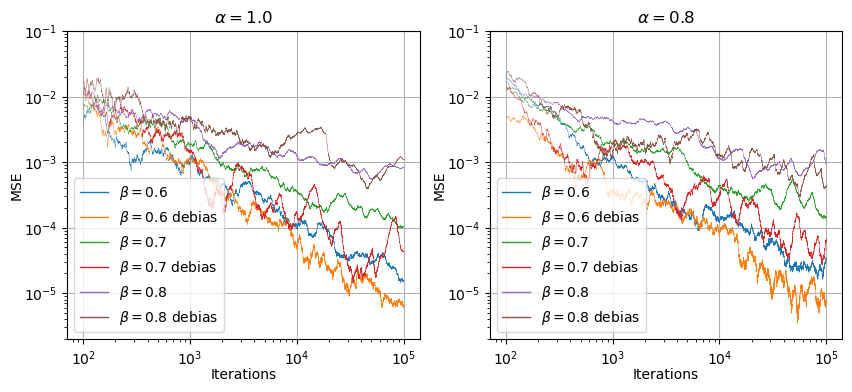

In [29]:
# plot debias

s = 100
num_ite = 100000
# num_ite = 100000
# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
# load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
load_path_de = '../workspace/LPSA/mse_debias_seed' + str(prob_seed) + '/'


plt.clf()
j = 0
plt.figure(figsize = (10, 4))
plt.subplots_adjust(hspace=0.3)

for alpha in [1.0, 0.8]:
    j = j + 1
#     ax1 = plt.subplot(2, 2, j)
# #     for beta in beta_list:
#     for beta in [0.0, 0.2, 0.4, 0.5]:
#         u_data = []
#         u_data_de = []
#         para = 'alpha' + str(alpha) + 'beta' + str(beta)
# #         alpha = para[2:5]
# #         beta = para[9:]
#         path = load_path + para + '/' 
#         path_de = load_path_de + para + '/'
#         for i in range(n_rep):
#             u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
#             u_data_de.append(np.load(path_de + 'mse' + str(i) + '.npy'))
#         u_data = np.array(u_data)
#         u_data = np.mean(u_data, 0)
#         u_data_de = np.array(u_data_de)
#         u_data_de = np.mean(u_data_de, 0)
#         legend_tmp = r'$\beta=$' + str(beta)
#         legend_tmp_de = r'$\beta=$' + str(beta) + ' debias'
#         plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
#         plt.loglog(np.arange(len(u_data))[s:num_ite], u_data_de[s:num_ite], label=legend_tmp_de, linewidth=0.3)
#     leg = plt.legend()
#     for line in leg.get_lines():
#         line.set_linewidth(1)
#     plt.grid()
#     plt.xlabel('Iterations', labelpad=0.5)
#     plt.ylabel('MSE', labelpad=0)
# #     plt.ylim([1e-6, 1e-0])
#     plt.title(r'$\alpha=$' + str(alpha))
    
    ax1 = plt.subplot(1, 2, j)
    for beta in [0.6, 0.7, 0.8]:
        u_data = []
        u_data_de = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
#         alpha = para[2:5]
#         beta = para[9:]
        path = load_path + para + '/' 
        path_de = load_path_de + para + '/'
        for i in range(n_rep):
            u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
            u_data_de.append(np.load(path_de + 'mse' + str(i) + '.npy'))
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        u_data_de = np.array(u_data_de)
        u_data_de = np.mean(u_data_de, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        legend_tmp_de = r'$\beta=$' + str(beta) + ' debias'
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data_de[s:num_ite], label=legend_tmp_de, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([2e-6, 1e-1])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/lc_debias.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

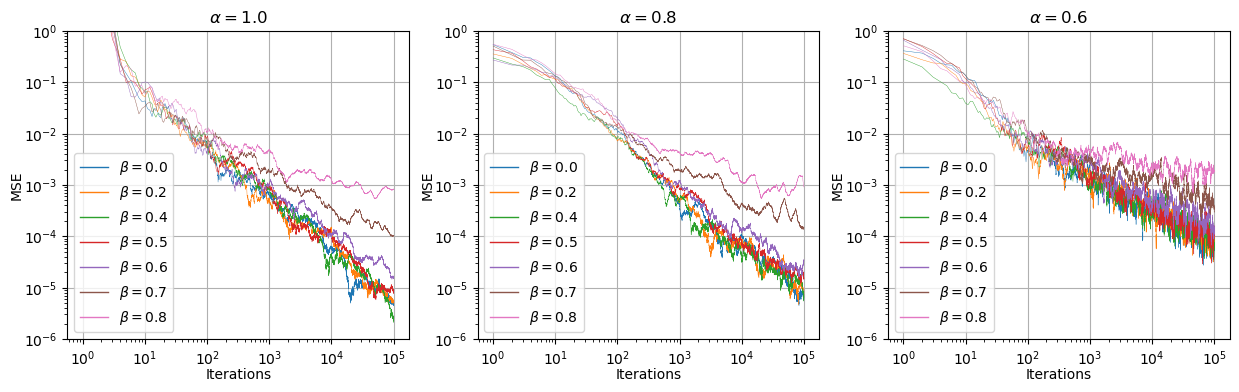

In [9]:
# plot: convergence rate

s = 1
# num_ite = 10000
num_ite = 100000
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
# load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '_sameinit/'
# load_path = '../workspace/LPSA/mse_tmp/'
n_rep = 10


plt.clf()
j = 0
plt.figure(figsize = (15, 4))
for alpha in [1.0, 0.8, 0.6]:
    j = j + 1
    ax1 = plt.subplot(1, 3, j)
    for beta in beta_list:
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
#         alpha = para[2:5]
#         beta = para[9:]
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([1e-6, 1e-0])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/lc_convergence_rate.pdf', bbox_inches='tight')

0
0
0
0


<Figure size 640x480 with 0 Axes>

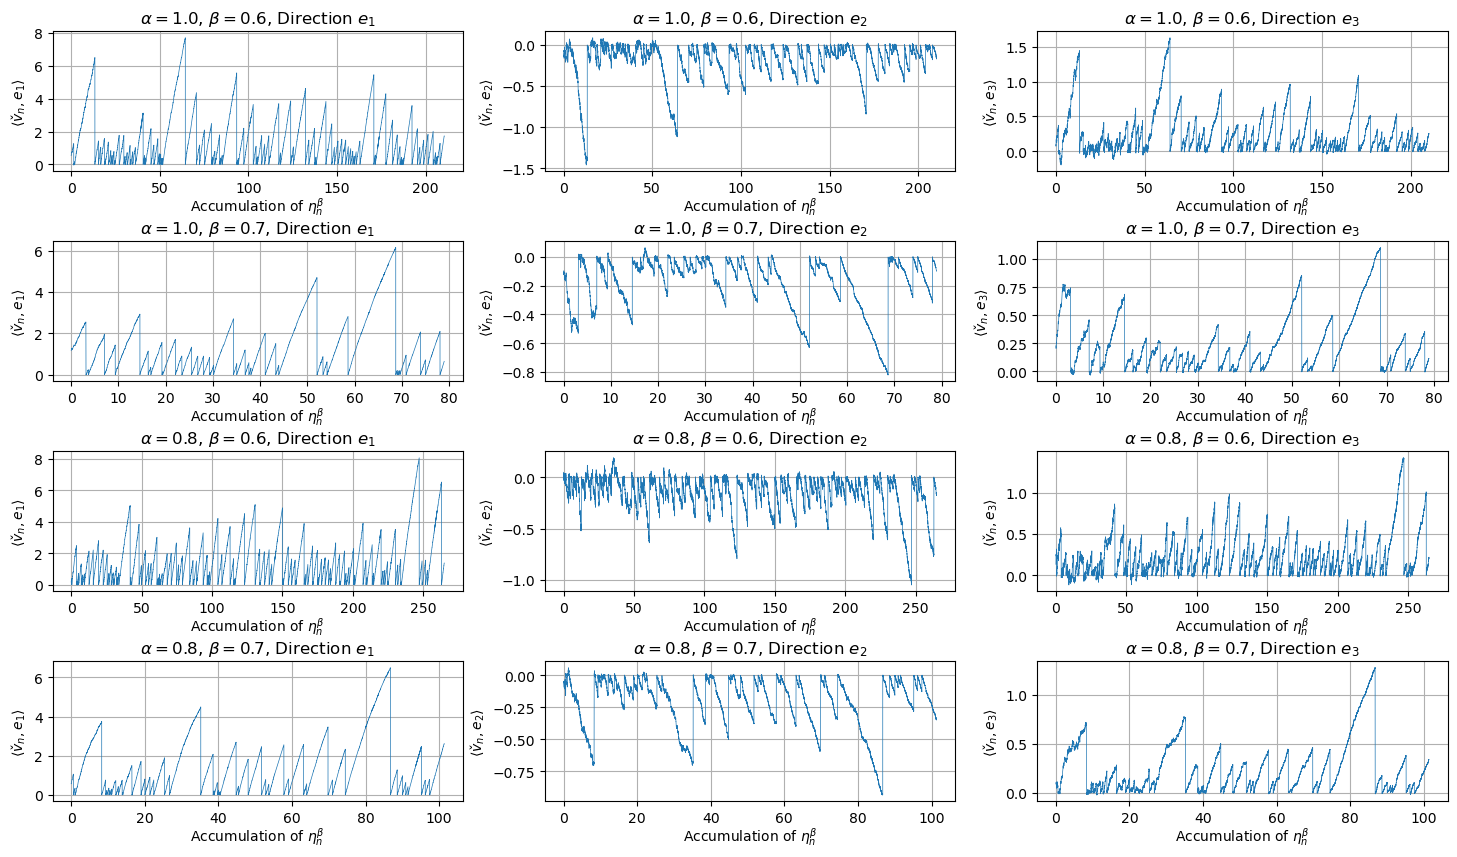

In [64]:
# plot: trajectories of rescaled v

s = 1000
num_ite = 100000
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
plt.clf()
j = 0
plt.figure(figsize = (18, 10))
para_list = ['alpha1.0beta0.6', 'alpha1.0beta0.7', 'alpha0.8beta0.6', 'alpha0.8beta0.7']
plt.subplots_adjust(hspace=0.5)


for para in para_list:
    alpha = float(para[5:8])
    beta = float(para[12:15])
    path = load_path + para + '/' 
    
    i_rep = 0
    print(i_rep)

#     u_data = np.load(path + 'u' + str(i_rep) + '.npy')[s:num_ite]
    v_data = np.load(path + 'v' + str(i_rep) + '.npy')[s:num_ite]
    eta = np.load(path + 'eta' + str(i_rep) + '.npy')[s:num_ite]
#     u_data = u_data @ U2
    v_data = v_data @ U1
#     print(u_data.shape, v_data.shape)
    v_data = (v_data.T * eta ** (beta - 1) ).T
    x = eta ** beta
    x = np.cumsum(x)
    
    
    ax1 = plt.subplot(4, 3, 1+3*j)
    plt.plot(x, v_data[:,0], label=i_rep, linewidth=0.5)
    plt.xlabel(r'Accumulation of $\eta_n^\beta$', labelpad=0)
    plt.ylabel(r'$\langle v\check{ }_n, e_1\rangle$')
    plt.grid()
    plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_1$')
    
    ax1 = plt.subplot(4, 3, 2+3*j)
    plt.plot(x, v_data[:,1], label=i_rep, linewidth=0.5)
    plt.xlabel(r'Accumulation of $\eta_n^\beta$', labelpad=0)
    plt.ylabel(r'$\langle v\check{ }_n, e_2\rangle$')
    plt.grid()
    plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_2$')
    
    ax1 = plt.subplot(4, 3, 3+3*j)
    plt.plot(x, v_data[:,2], label=i_rep, linewidth=0.5)
    plt.xlabel(r'Accumulation of $\eta_n^\beta$', labelpad=0)
    plt.ylabel(r'$\langle v\check{ }_n, e_3\rangle$')
    
    plt.grid()
    plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_3$')

    j = j + 1
    
# plt.savefig(path + 'traj_v.pdf', bbox_inches='tight')
plt.savefig('./figs/lc_traj_v.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

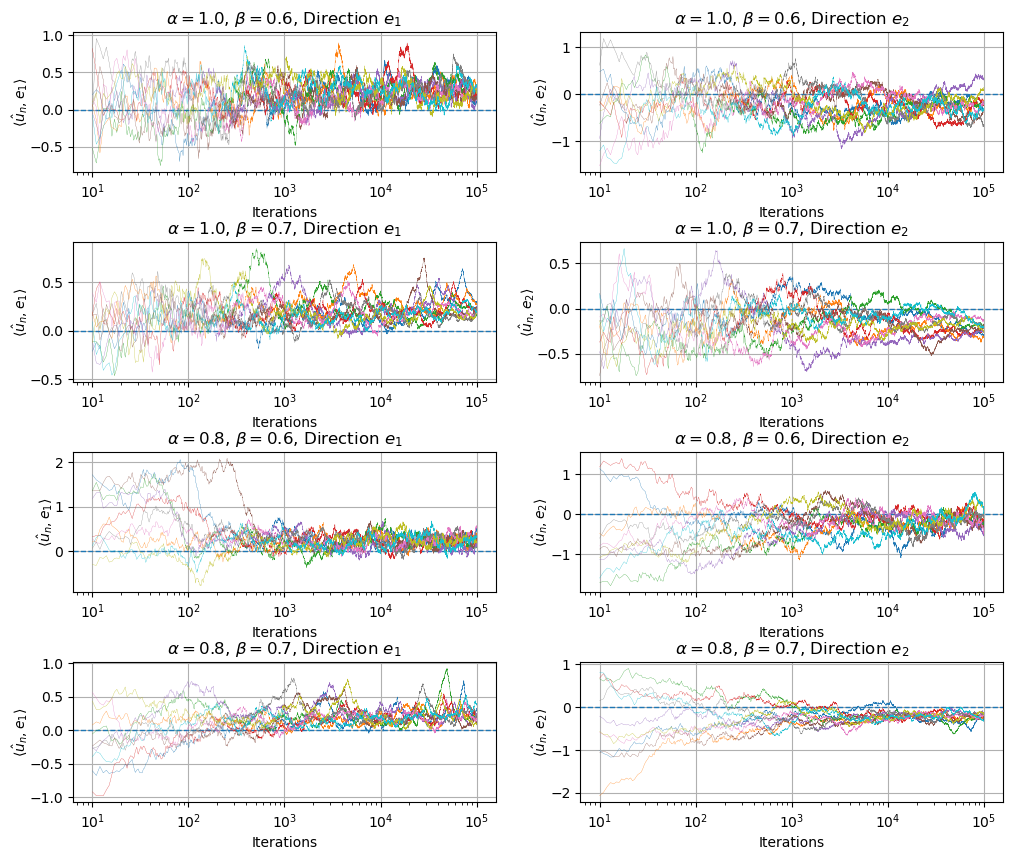

In [89]:
# plot: asymptotic bias of rescaled u

prob_seed = 1

s = 10
num_ite = 100000
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
plt.clf()
j = 0
plt.figure(figsize = (12, 10))
para_list = ['alpha1.0beta0.6', 'alpha1.0beta0.7', 'alpha0.8beta0.6', 'alpha0.8beta0.7']

plt.subplots_adjust(hspace=0.5)
# plt.subplots_adjust(vspace=0.1)
n_rep = 10

for para in para_list:
    alpha = float(para[5:8])
    beta = float(para[12:15])
    path = load_path + para + '/' 
    
#     for i_rep in [0,1,2,3,4]:
    for i_rep in range(n_rep):
#         print(i_rep)

        u_data = np.load(path + 'u' + str(i_rep) + '.npy')[s:num_ite]
    #     v_data = np.load(path + 'v' + str(i_rep) + '.npy')[s:num_ite]
        eta = np.load(path + 'eta' + str(i_rep) + '.npy')[s:num_ite]
        u_data = u_data @ U2
    #     v_data = v_data @ U1
    #     print(u_data.shape, v_data.shape)
        u_data = (u_data.T / eta ** (1-beta) ).T
    #     x = eta ** beta
    #     x = np.cumsum(x)


        ax1 = plt.subplot(4, 2, 1+2*j)
        plt.plot(np.arange(s, num_ite), u_data[:,0], label=i_rep, linewidth=0.2)
        plt.xlabel('Iterations')
        plt.xscale('log')
        plt.ylabel(r'$\langle\hat{u}_n, e_1\rangle$', labelpad=0)
        plt.grid(1)
        plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_1$')
        if i_rep == 0:
            plt.axhline(y=0, ls='--', linewidth=1)

        ax1 = plt.subplot(4, 2, 2+2*j)
        plt.plot(np.arange(s, num_ite), u_data[:,1], label=i_rep, linewidth=0.2)
        plt.xlabel('Iterations')
        plt.xscale('log')
        plt.ylabel(r'$\langle\hat{u}_n, e_2\rangle$', labelpad=0)
        plt.grid(1)
        plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_2$')
        if i_rep == 0:
            plt.axhline(y=0, ls='--', linewidth=1)
        
    j = j + 1
    
# plt.savefig(path + 'bias_u.pdf', bbox_inches='tight')
plt.savefig('./figs/lc_bias_u.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

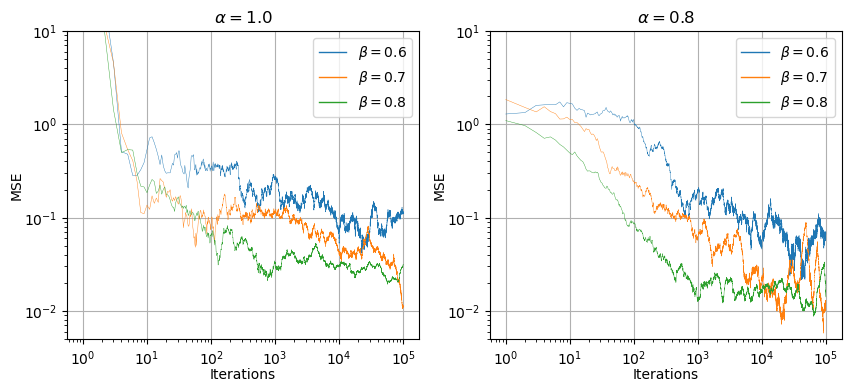

In [74]:
# L2 error of rescaled u

bias_tmp = proj_A_bot @ mat_S @ (mat_S @ sol - vec_b)
# for alpha < 1
bias_les1 = np.linalg.pinv(proj_A_bot @ mat_S @ proj_A_bot) @ bias_tmp  / prob0

prob_seed = 1
eta0 = 1

s = 1
num_ite = 100000
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
plt.clf()

j = 0
plt.figure(figsize = (10, 4))


# plt.subplots_adjust(hspace=0.5)
n_rep = 10

        
# for alpha in [1.0, 0.8, 0.6]:    
for alpha in [1.0, 0.8]:    
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in [0.6, 0.7, 0.8]:
        if alpha > 0.99:
            bias = np.linalg.pinv(proj_A_bot @ (mat_S - (1 - beta) / eta0) @ proj_A_bot) @ bias_tmp / prob0
        else:
            bias = bias_les1
        
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_tmp = np.load(path + 'u' + str(i) + '.npy')
            eta_tmp = np.load(path + 'eta' + str(i) + '.npy')
            u_tmp = (u_tmp.T / eta_tmp ** (1-beta) ).T
            u_tmp = np.linalg.norm(u_tmp - bias, axis=1)**2
            u_data.append(u_tmp)
        u_data = np.array(u_data)
#         print(u_data.shape)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
#         plt.loglog(np.log(np.arange(len(u_data))[s:num_ite]), u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([5e-3, 1e1])
    plt.title(r'$\alpha=$' + str(alpha))
        
#     j = j + 1
    
# plt.savefig(path + 'bias_u_over_ite.pdf', bbox_inches='tight')
plt.savefig('./figs/lc_bias_u_over_ite.pdf', bbox_inches='tight')

(9902,)
(6156,)
(792,)
(295,)
(102,)
(43,)
(17,)
(9887,)
(6723,)
(936,)
(341,)
(132,)
(47,)
(18,)


<Figure size 640x480 with 0 Axes>

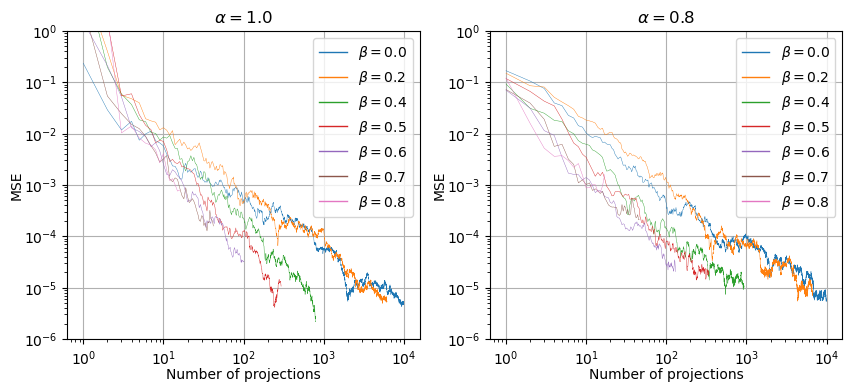

In [76]:
# plot: mse over the number of projection

s = 1
num_ite = 100000
# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'

plt.clf()
j = 0
plt.figure(figsize = (10, 4))
# for alpha in [1.0, 0.8, 0.6]:
for alpha in [1.0, 0.8]:
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in beta_list:
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = load_path + para + '/' 
        min_len = num_ite
        for i in range(n_rep):
            u_tmp = np.load(path + 'mse' + str(i) + '.npy')
            f_tmp = np.load(path + 'f' + str(i) + '.npy')
            ind = f_tmp > 0
            if sum(ind > 0) < min_len:
                min_len = sum(ind > 0)
#             print(u_tmp.shape, f_tmp.shape, len(f_tmp[ind]))
            u_data.append(u_tmp[ind])
        for i in range(n_rep):
            u_data[i] = u_data[i][:min_len]
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        print(u_data.shape)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:min_len], u_data[s:min_len], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Number of projections', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([1e-6, 1e-0])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/lc_mse_over_proj.pdf', bbox_inches='tight')



(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)


<Figure size 640x480 with 0 Axes>

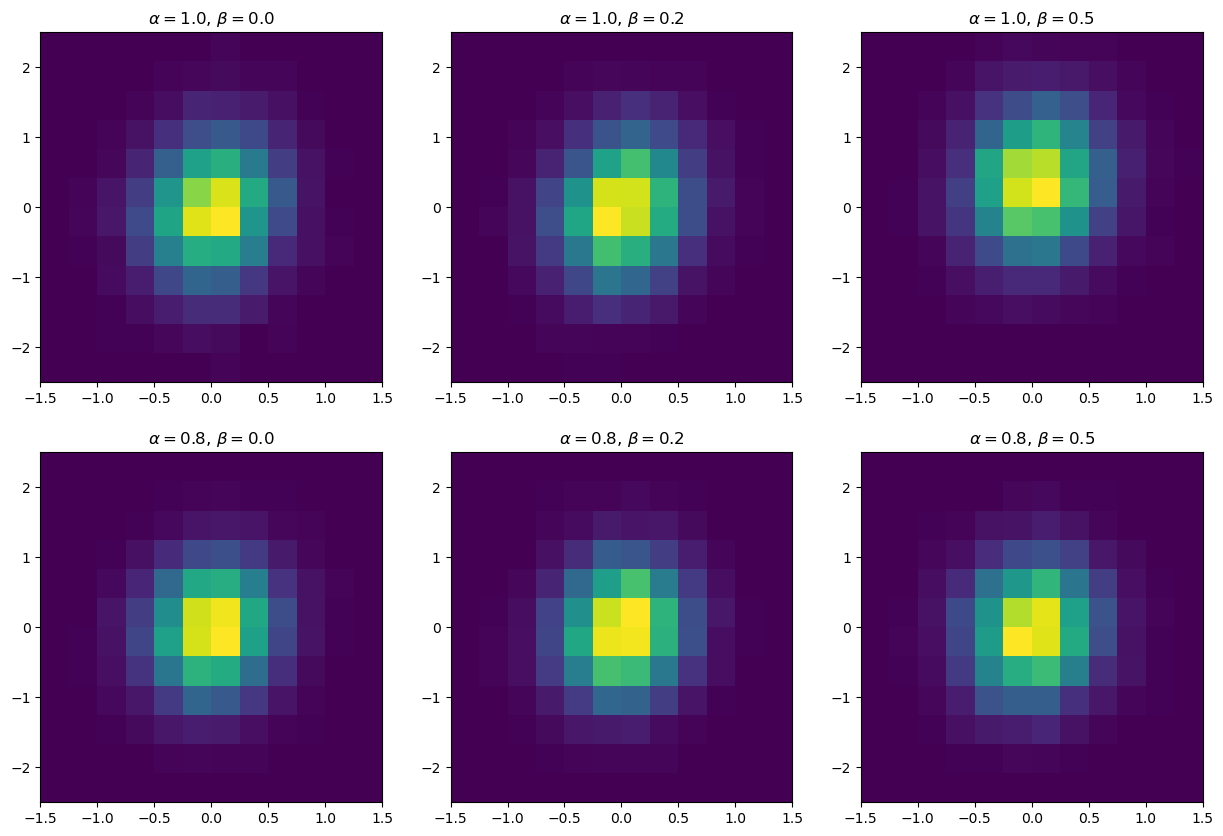

In [62]:
# plot heatmap

n_bins = 12
# num_ite = 100000
load_path = '../workspace/LPSA/heatmap_seed' + str(prob_seed) + '/'
# load_path = '../workspace/LPSA/heatmap_seed' + str(prob_seed) + '_old/'

para_list = ['alpha1.0beta0.0', 'alpha1.0beta0.2','alpha1.0beta0.5','alpha0.8beta0.0', 'alpha0.8beta0.2', 'alpha0.8beta0.5']
# plt.subplots_adjust(hspace=0.5)

plt.clf()
plt.figure(figsize = (15, 10))
# plt.figure(figsize = (20, 10))
j = 0

bias_tmp = proj_A_bot @ mat_S @ (mat_S @ sol - vec_b)
# for alpha < 1
bias_les1 = np.linalg.pinv(proj_A_bot @ mat_S @ proj_A_bot) @ bias_tmp  / prob0

for para in para_list:
    alpha = float(para[5:8])
    beta = float(para[12:15])
    path = load_path + para + '/' 
    j = j + 1
    
    ax1 = plt.subplot(2, 3, j)

    u_data = np.load(path + 'u' + '.npy')
    print(u_data.shape)
    if abs(beta - 0.5) < 1e-8:
        if alpha > 0.99:
            bias = np.linalg.pinv(proj_A_bot @ (mat_S - (1 - beta) / eta0) @ proj_A_bot) @ bias_tmp / prob0
        else:
            bias = bias_les1
        u_data = u_data - bias @ U2
    
    hist_range = [[-1.5, 1.5], [-2.5, 2.5]]
    plt.hist2d(u_data[:,0], u_data[:,1], range=hist_range, bins=n_bins)
#     heatmap, xedges, yedges = np.histogram2d(u_data[:,0], u_data[:,1], bins=n_bins)
#     xy_min = min(xedges[0], yedges[0])
#     xy_max = max(xedges[-1], yedges[-1])
#     # extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     extent = [xy_min, xy_max, xy_min, xy_max]
#     plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta))
    
#     if abs(beta - 0.5) < 1e-8:
#         j = j + 1
#         ax1 = plt.subplot(2, 4, j)
#         if alpha > 0.99:
#             var_tmp = U2.T @ (mat_S - 1 / 2 / eta0) @ U2
#         else:
#             var_tmp = U2.T @ mat_S @ U2
#         var_tmp2 = var * U2.T @ U2
#         inv_tmp = np.kron(var_tmp, np.identity(d2)) + np.kron(np.identity(d2), var_tmp)
#         var_asp = np.linalg.solve(inv_tmp, var_tmp2.reshape(-1)).reshape((d2, d2))
#         [tmp_D, tmp_U] = np.linalg.eig(var_asp)
#         var_asp_sqrt = (np.sqrt(tmp_D) * tmp_U) @ tmp_U.T

#         var_rand = var_asp_sqrt @ np.random.randn(d2, 10000)
#         plt.hist2d(var_rand[0,:], var_rand[1,:], range=hist_range, bins=n_bins)
#         plt.title(r'limiting distribution for $\alpha=$'+ str(alpha))


        
    
# plt.savefig('./figs/lc_heatmap.pdf', bbox_inches='tight')

[[0.11323343 0.06300259]
 [0.06300259 1.04918174]]


(array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.],
        [  0.,   0.,   4.,   2.,   0.,   4.,   1.,   0.,   1.,   0.,   0.,
           0.],
        [ 10.,   6.,   3.,  22.,  15.,  15.,  16.,  11.,  11.,   1.,   0.,
           0.],
        [ 13.,  28.,  46.,  81.,  87.,  86.,  85.,  70.,  28.,  26.,   7.,
           5.],
        [ 34.,  72., 144., 177., 252., 244., 236., 199., 110.,  70.,  31.,
          10.],
        [ 36.,  94., 174., 274., 367., 447., 443., 332., 270., 157.,  76.,
          31.],
        [ 25.,  67., 152., 245., 342., 445., 420., 415., 290., 185.,  69.,
          38.],
        [ 15.,  33.,  58., 112., 185., 238., 245., 242., 181., 108.,  65.,
          36.],
        [  0.,  11.,  24.,  28.,  54.,  94.,  97.,  75.,  64.,  51.,  34.,
          15.],
        [  1.,   2.,   5.,   9.,   6.,   9.,  28.,  22.,  10.,  13.,   5.,
           1.],
        [  0.,   0.,   0.,   0.,   1.,   2.,   2.,   4.,   2.,   1.,   0.,
           1.],

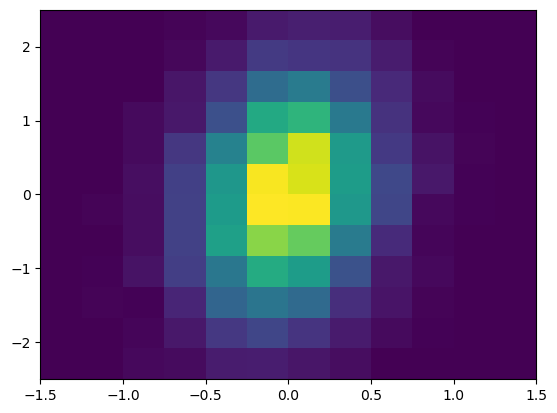

In [57]:
alpha = 1
if alpha > 0.99:
    var_tmp = U2.T @ (mat_S - 1 / 2 / eta0) @ U2
else:
    var_tmp = proj_A_bot @ mat_S @ proj_A_bot

var_tmp2 = var * U2.T @ U2

# tmp_inv = np.kron(var_tmp, np.identity(d1)) + np.kron(np.identity(d1), var_tmp)

var_asp = np.linalg.solve(np.kron(var_tmp, np.identity(d2)) + np.kron(np.identity(d2), var_tmp), var_tmp2.reshape(-1)).reshape((d2, d2))
print(var_asp)
[tmp_D, tmp_U] = np.linalg.eig(var_asp)
var_asp_sqrt = (np.sqrt(tmp_D) * tmp_U) @ tmp_U.T

var_rand = var_asp_sqrt @ np.random.randn(d2, 10000)
# print(var_rand[:, :10])
plt.hist2d(var_rand[0,:], var_rand[1,:], range=hist_range, bins=n_bins)